# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 14.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.0/852.0 kB 11.5 MB/s eta 0:00:00a 0:00:01


In [54]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import warnings
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [12]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
).dropna()
df_mercado_trends["Date"] = pd.to_datetime(df_mercado_trends["Date"], utc=True)
df_mercado_trends = df_mercado_trends.set_index("Date")



# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/cf/y6vhhqvs245bxntt_6f300v00000gp/T/ipykernel_90113/2501836822.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends["Date"] = pd.to_datetime(df_mercado_trends["Date"], utc=True)


,Search Trends
Date,
2016-06-01 00:00:00+00:00,97
2016-06-01 01:00:00+00:00,92
2016-06-01 02:00:00+00:00,76
2016-06-01 03:00:00+00:00,60
2016-06-01 04:00:00+00:00,38


,Search Trends
Date,
2020-09-07 20:00:00+00:00,71
2020-09-07 21:00:00+00:00,83
2020-09-07 22:00:00+00:00,96
2020-09-07 23:00:00+00:00,97
2020-09-08 00:00:00+00:00,96


In [13]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00+00:00 to 2020-09-08 00:00:00+00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

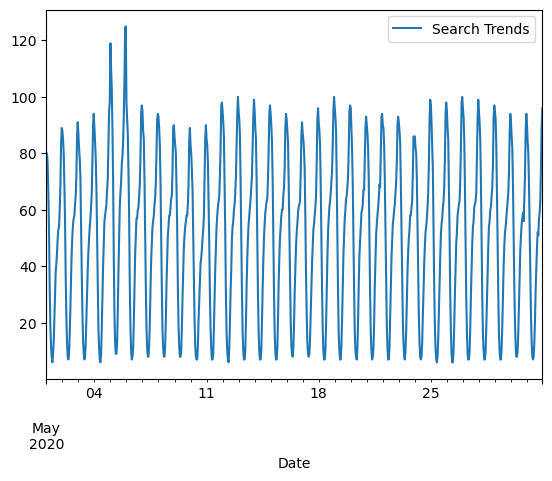

In [14]:
# Slice the DataFrame to just the month of May 2020
df_mercado_trends_may_2020 = df_mercado_trends.loc["2020-05-01":"2020-05-31"]

# Plot to visualize the data for May 2020
df_mercado_trends_may_2020.plot()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [15]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_mercado_trends_may_2020.sum()


# View the traffic_may_2020 value
traffic_may_2020


Search Trends    38181
dtype: int64

In [16]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()


# View the median_monthly_traffic value
median_monthly_traffic


Search Trends    35172.5
dtype: float64

In [17]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
# Divide the may traffic total by the median monthly traffic
traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** The total Google search traffic for MercadoLibre in May 2020 was 38,181. When comparing this to the median monthly traffic of 35,172.5, we get a ratio of approximately 1.085536. This indicates that the search traffic in May 2020 was roughly 8.55% higher than the median monthly traffic.

The visual pattern in the graph for May 2020 suggests regular fluctuations in search traffic, which could be indicative of weekly cycles in user search behavior. Furthermore, the fact that the search traffic for May 2020 is higher than the median could point to an increase in searches due to MercadoLibre's release of their quarterly financial results, as such events often drive increased interest from investors, analysts, and the general public. This uptick aligns with the release of financial information, which is a significant event that can influence both search trends and investor behavior.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<Axes: xlabel='Date'>

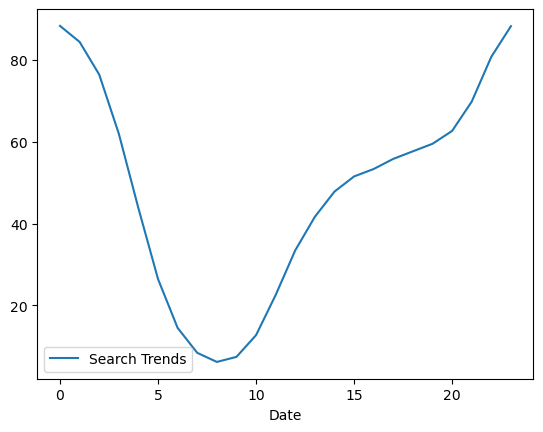

In [19]:
# Group the hourly search data to plot the average traffic by hour of the day
df_mercado_trends.groupby(df_mercado_trends.index.hour).mean().plot()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='Date'>

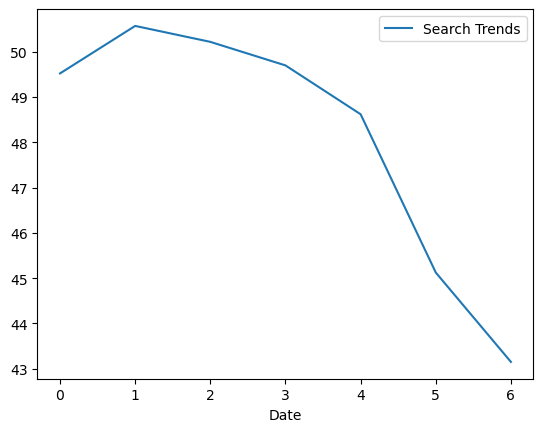

In [20]:
# Group the hourly search data to plot the average traffic by the day of week
df_mercado_trends.groupby(df_mercado_trends.index.dayofweek).mean().plot()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='week'>

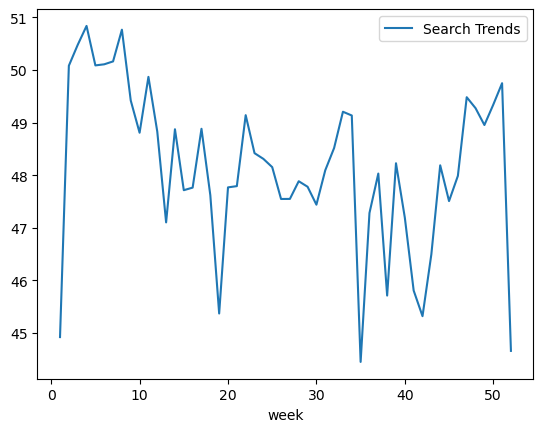

In [23]:
# Group the hourly search data to plot the average traffic by the week of the year
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean().plot()


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Based on the visual patterns depicted in the three graphs, we can observe the following time-based trends in the Google search traffic data:

**Daily Trends:** The first graph seems to show daily fluctuations in search traffic. There are noticeable peaks and troughs which could correspond to higher search activities during specific hours of the day, possibly indicating peak user activity times.

**Weekly Trends:** The second graph displays a trend over the span of a week. The search traffic starts high, dips significantly towards the middle of the week, and then rises again. This pattern suggests a weekly cycle in search behavior, which could be influenced by work schedules, as search traffic might drop during weekdays and pick up during weekends.

**Annual/Seasonal Trends:** The third graph appears to represent weekly search trends across an entire year. The data exhibits a somewhat regular pattern with periodic rises and falls. This could indicate seasonality in search traffic, where certain times of the year (perhaps related to holidays, events, or shopping seasons) correspond to increased search activity.

These observations suggest that **MercadoLibre's search traffic is influenced by daily, weekly, and seasonal cycles.** Understanding these patterns can be crucial for planning marketing and sales strategies, as well as for stock trading decisions if these trends correlate with the company's stock performance.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [24]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv"
).dropna()
df_mercado_stock["date"] = pd.to_datetime(df_mercado_stock["date"], utc=True)
df_mercado_stock = df_mercado_stock.set_index("date")

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00+00:00,127.67
2015-01-02 10:00:00+00:00,125.44
2015-01-02 11:00:00+00:00,125.57
2015-01-02 12:00:00+00:00,125.40
2015-01-02 13:00:00+00:00,125.17


,close
date,
2020-07-31 11:00:00+00:00,1105.780
2020-07-31 12:00:00+00:00,1087.925
2020-07-31 13:00:00+00:00,1095.800
2020-07-31 14:00:00+00:00,1110.650
2020-07-31 15:00:00+00:00,1122.510


<Axes: xlabel='date'>

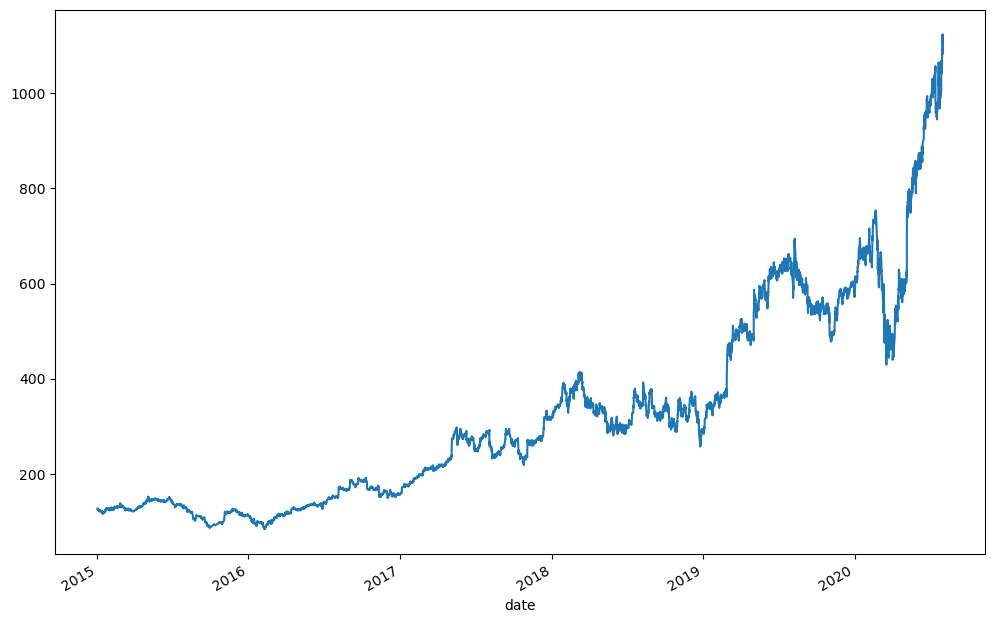

In [25]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock["close"].plot(figsize=(12,8))


In [26]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()


# View the first and last five rows of the DataFrame
display(df_mercado.head())


,close,Search Trends
2016-06-01 09:00:00+00:00,135.16,6.0
2016-06-01 10:00:00+00:00,136.63,12.0
2016-06-01 11:00:00+00:00,136.56,22.0
2016-06-01 12:00:00+00:00,136.42,33.0
2016-06-01 13:00:00+00:00,136.10,40.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [27]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
# and store in a new DataFrame
first_half_2020 = df_mercado.loc["2020-01-01":"2020-06-30"]


# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())


,close,Search Trends
2020-01-02 09:00:00+00:00,601.085,9.0
2020-01-02 10:00:00+00:00,601.290,14.0
2020-01-02 11:00:00+00:00,615.410,25.0
2020-01-02 12:00:00+00:00,611.400,37.0
2020-01-02 13:00:00+00:00,611.830,50.0


array([<Axes: >, <Axes: >], dtype=object)

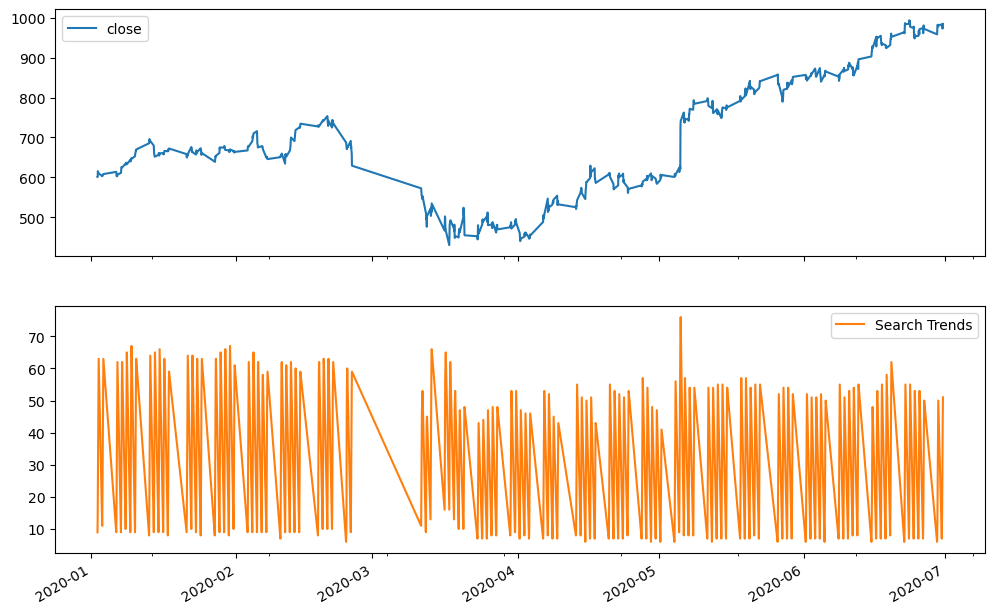

In [28]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020.plot(subplots=True, figsize=(12,8))


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Exploring the relationship between MercadoLibre's stock performance and Google search volumes is a bit like piecing together a puzzle with some missing pieces. While we're hard-pressed to find a clear and consistent pattern that links the two throughout most of the year, there's a notable exception in May. Around this time, just as MercadoLibre was releasing its quarterly earnings, we see a flicker of a connection: a possible, though not crystal clear, correlation between a change in stock prices and a spike in Google searches. Apart from this instance, there are moments when the two seem to march in step. Take the notable period between March and April, where a dip in the company's stock value is mirrored by a quieter search landscape. But as the year unfolds, this connection seems to stretch and fray, with the stock's upward trajectory not quite reflected in the rhythm of Google searches.



#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [29]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_mercado["Lagged Search Trends"] = df_mercado["Search Trends"].shift(1)
df_mercado.head()



,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00+00:00,135.16,6.0,NaN
2016-06-01 10:00:00+00:00,136.63,12.0,6.0
2016-06-01 11:00:00+00:00,136.56,22.0,12.0
2016-06-01 12:00:00+00:00,136.42,33.0,22.0
2016-06-01 13:00:00+00:00,136.10,40.0,33.0


In [30]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado["Stock Volatility"] = df_mercado["close"].pct_change().rolling(4).std()
df_mercado.head()



,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00+00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00+00:00,136.63,12.0,6.0,NaN
2016-06-01 11:00:00+00:00,136.56,22.0,12.0,NaN
2016-06-01 12:00:00+00:00,136.42,33.0,22.0,NaN
2016-06-01 13:00:00+00:00,136.10,40.0,33.0,0.006134


<Axes: >

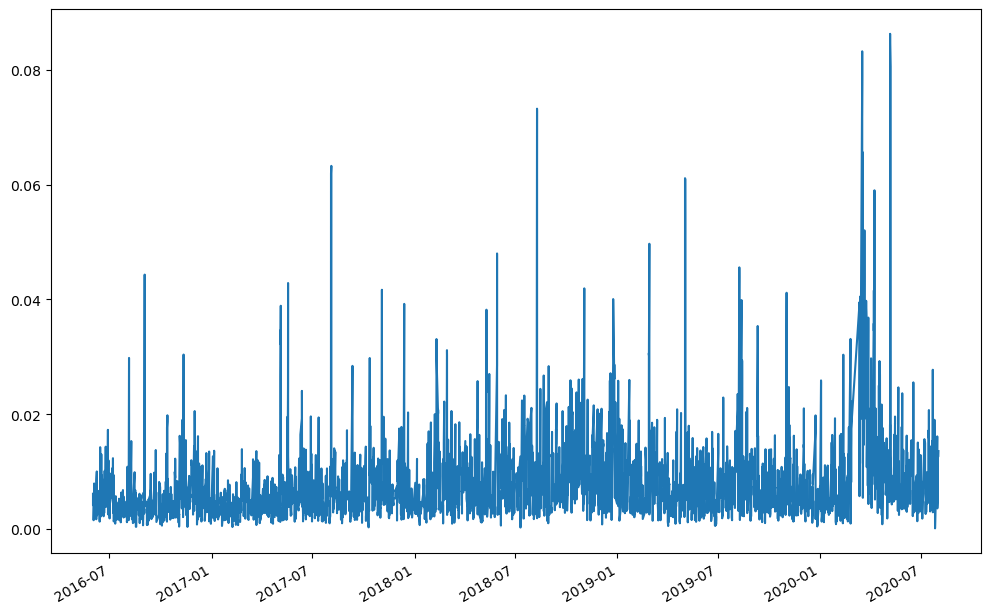

In [31]:
# Visualize the stock volatility
df_mercado["Stock Volatility"].plot(figsize=(12,8))



**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [34]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price column
df_mercado["Hourly Stock Return"] = df_mercado["close"].pct_change()



In [35]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado.head())


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00+00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00+00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00+00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00+00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00+00:00,136.10,40.0,33.0,0.006134,-0.002346


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [36]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado[["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]].corr()



,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** Given the correlation coefficients, we can infer that there is no strong predictable relationship between lagged search traffic and stock volatility or between lagged search traffic and stock price returns. The negative correlation with stock volatility is weak, suggesting that while there might be a slight tendency for search traffic to inversely relate to volatility, it's not strong enough to be deemed predictive. Similarly, the positive correlation with stock returns is also weak, indicating that search trends do not strongly predict the direction of stock price movements on an hourly basis.

In both cases, the correlations are not sufficiently robust to conclude a reliable predictive relationship. For investment or trading decisions, relying on lagged search traffic as a sole indicator for stock volatility or returns would not be advisable without further analysis and the inclusion of additional data points and factors.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [37]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends = df_mercado_trends.rename(columns={"Date": "ds", "Search Trends": "y"})


# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends = df_mercado_trends.dropna()


# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())



,ds,y
0,2016-06-01 00:00:00+00:00,97
1,2016-06-01 01:00:00+00:00,92
2,2016-06-01 02:00:00+00:00,76
3,2016-06-01 03:00:00+00:00,60
4,2016-06-01 04:00:00+00:00,38


,ds,y
37101,2020-09-07 20:00:00+00:00,71
37102,2020-09-07 21:00:00+00:00,83
37103,2020-09-07 22:00:00+00:00,96
37104,2020-09-07 23:00:00+00:00,97
37105,2020-09-08 00:00:00+00:00,96


In [38]:
# Call the Prophet function, store as an object
mercado_model = Prophet()


In [40]:
# Fit the time-series model.
# Convert 'ds' column to timezone-naive
df_mercado_trends['ds'] = df_mercado_trends['ds'].dt.tz_localize(None)

# Fit the model
mercado_model.fit(df_mercado_trends)



10:16:05 - cmdstanpy - INFO - Chain [1] start processing
10:16:17 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = mercado_model.make_future_dataframe(periods=2000, freq='H')


# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [47]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = mercado_model.predict(future_mercado_trends)


# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.63525,80.986122,98.355085,44.63525,44.63525,45.029322,45.029322,45.029322,41.452573,...,1.860916,1.860916,1.860916,1.715833,1.715833,1.715833,0.0,0.0,0.0,89.664572
1,2016-06-01 01:00:00,44.63606,77.381604,94.123378,44.63606,44.63606,41.475142,41.475142,41.475142,37.943451,...,1.810814,1.810814,1.810814,1.720877,1.720877,1.720877,0.0,0.0,0.0,86.111202
2,2016-06-01 02:00:00,44.63687,66.645364,84.274519,44.63687,44.63687,31.151675,31.151675,31.151675,27.656565,...,1.769220,1.769220,1.769220,1.725890,1.725890,1.725890,0.0,0.0,0.0,75.788545
3,2016-06-01 03:00:00,44.63768,51.955612,68.982781,44.63768,44.63768,15.884456,15.884456,15.884456,12.417360,...,1.736225,1.736225,1.736225,1.730871,1.730871,1.730871,0.0,0.0,0.0,60.522136
4,2016-06-01 04:00:00,44.63849,34.626270,51.799518,44.63849,44.63849,-1.230447,-1.230447,-1.230447,-4.678054,...,1.711786,1.711786,1.711786,1.735821,1.735821,1.735821,0.0,0.0,0.0,43.408043


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

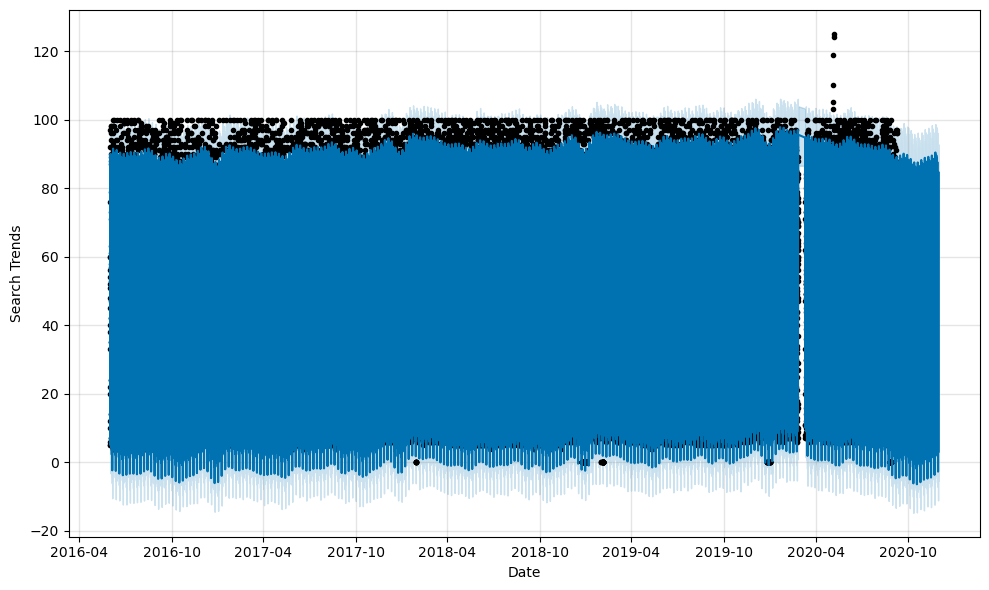

In [56]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
# Plot the Prophet predictions for the Mercado trends data
    mercado_model.plot(forecast_mercado_trends, xlabel = 'Date', ylabel = 'Search Trends')



##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** Based on the information available, the near-term forecast for MercadoLibre's popularity, as indicated by search trends, appears to return to a more typical pattern after a significant spike. This could mean that the recent high interest is temporary, possibly related to a specific event or announcement that drew public attention. Following this, the model predicts a reversion to the usual search interest levels. It's important to note, however, that forecasts are subject to uncertainty and the actual future popularity will depend on numerous factors including market dynamics, company performance, and overall economic conditions.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [49]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')



In [50]:
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.664572,80.986122,98.355085
2016-06-01 01:00:00,86.111202,77.381604,94.123378
2016-06-01 02:00:00,75.788545,66.645364,84.274519
2016-06-01 03:00:00,60.522136,51.955612,68.982781
2016-06-01 04:00:00,43.408043,34.626270,51.799518


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

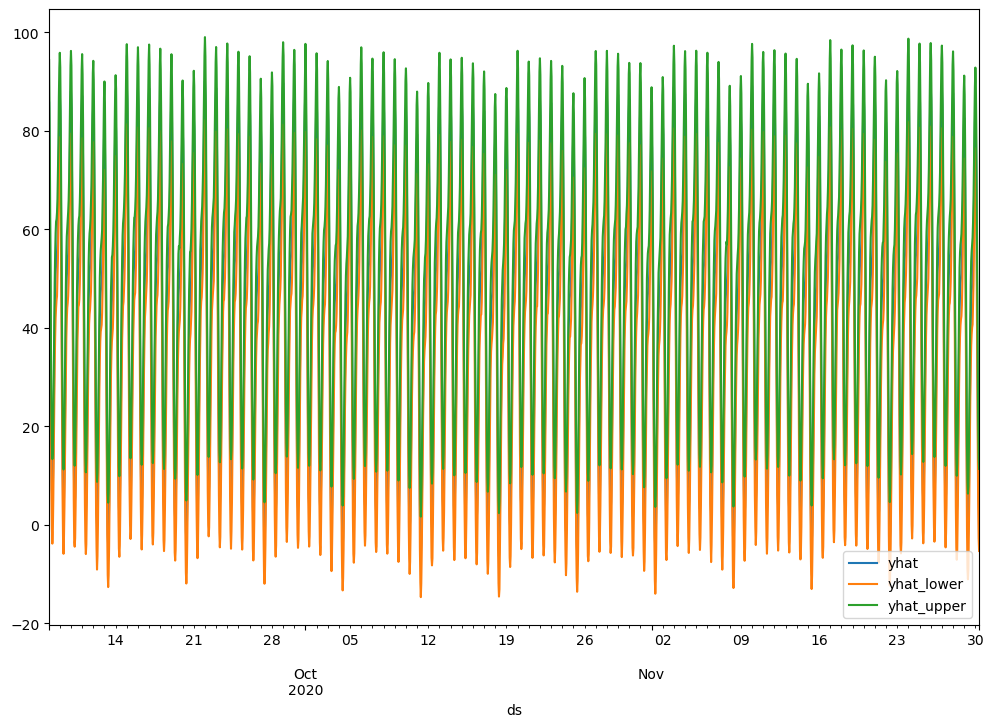

In [51]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours (approx 80 days)
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot(figsize=(12,8))


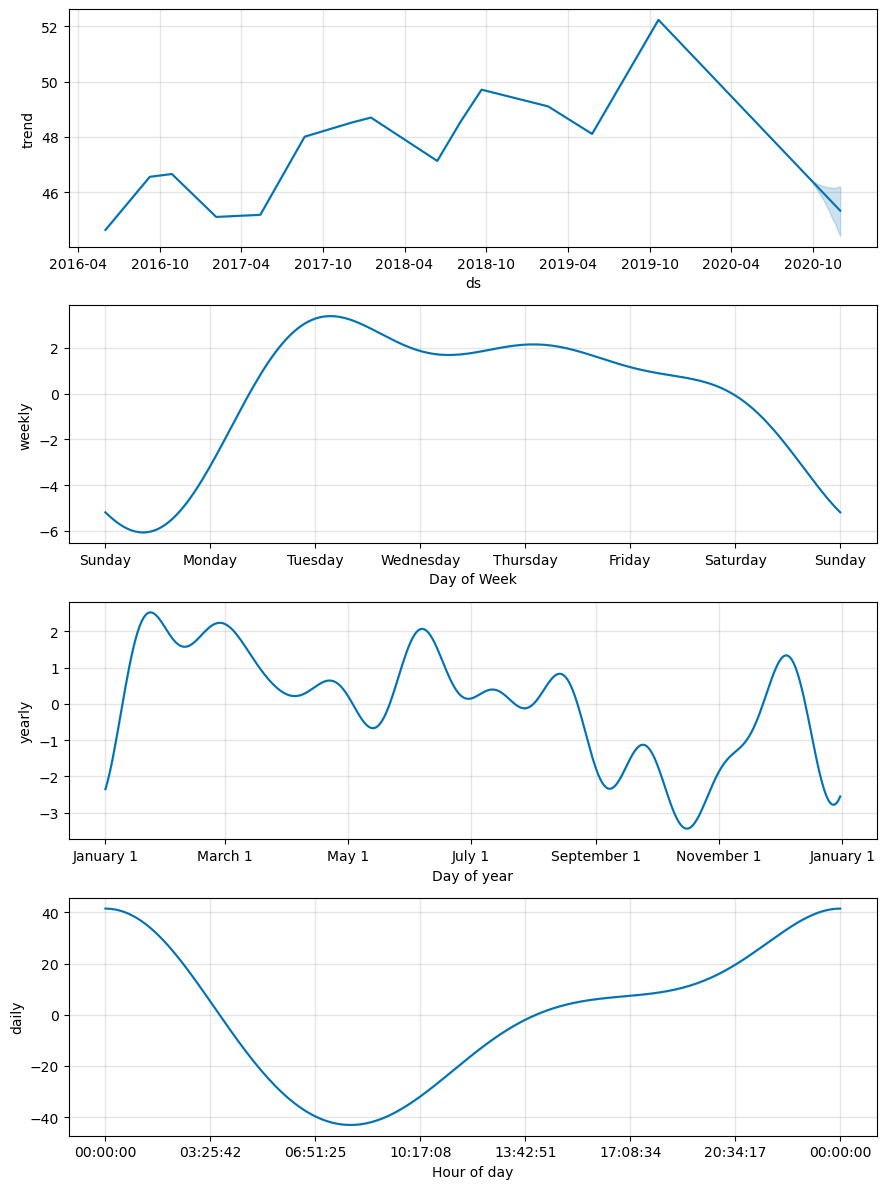

In [58]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
    mercado_model.plot_components(forecast_mercado_trends)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The time of day that exhibits the greatest popularity for MercadoLibre search trends is in the late evening, just before midnight. The graph shows a significant increase in search activity during this time, indicating that users are most actively searching for MercadoLibre related information then.

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** According to the weekly component of the graph, the day of the week that receives the most search traffic for MercadoLibre is Sunday. The graph shows a peak in search activity on Sundays, with a gradual decrease through the week, reaching the lowest point on Friday before climbing again.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest point for search traffic in the calendar year, as seen in the third component of the graph, occurs at the very beginning of the year, right after January 1st. This suggests that search activity for MercadoLibre is at its minimum just after New Year's Day.
